# **Set up**

## Import libs

In [24]:
import requests
import pandas as pd
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load and read data**

In [9]:
# Load archives: Create a process to read files from the source.

train_src_path = 'https://raw.githubusercontent.com/DenisPeskoff/2020_acl_diplomacy/master/data/train.jsonl'
test_src_path = 'https://raw.githubusercontent.com/DenisPeskoff/2020_acl_diplomacy/master/data/test.jsonl'
validation_src_path = 'https://raw.githubusercontent.com/DenisPeskoff/2020_acl_diplomacy/master/data/validation.jsonl'

def load_jsonl_from_url(url):
    response = requests.get(url)
    response.raise_for_status()
    lines = response.text.splitlines()
    return [json.loads(line) for line in lines]

train_data = load_jsonl_from_url(train_src_path)
test_data = load_jsonl_from_url(test_src_path)
validation_data = load_jsonl_from_url(validation_src_path)

In [17]:
# Convert read json into dataframe

df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)
df_val = pd.DataFrame(validation_data)

def explode_df(df):
    return df.explode(['messages', 'sender_labels', 'receiver_labels', 'absolute_message_index',
                        'relative_message_index', 'seasons', 'years', 'game_score', 'game_score_delta',
                        'speakers', 'receivers']).reset_index(drop=True)

dfexp_train = explode_df(df_train)
dfexp_test = explode_df(df_test)
dfexp_val = explode_df(df_val)

# Output: three DataFrames with the data separated for train, test, and evaluation

# **Exploratory data analysis**

In [20]:
# Create a single DataFrame, generating a category to distinguish the data source for training. With a single DataFrame, exploratory analysis will be easier.

dfexp_train['category'] = 'train'
dfexp_test['category'] = 'test'
dfexp_val['category'] = 'val'

df_to_eda = pd.concat([dfexp_train, dfexp_test, dfexp_val], ignore_index=True)
df_to_eda.head()

,messages,sender_labels,receiver_labels,speakers,receivers,absolute_message_index,relative_message_index,seasons,years,game_score,game_score_delta,players,game_id,category
0,Germany!\n\nJust the person I want to speak wi...,True,True,italy,germany,74,0,Spring,1901,3,0,"[italy, germany]",1,train
1,"You've whet my appetite, Italy. What's the sug...",True,True,germany,italy,76,1,Spring,1901,3,0,"[italy, germany]",1,train
2,👍,True,True,italy,germany,86,2,Spring,1901,3,0,"[italy, germany]",1,train
3,It seems like there are a lot of ways that cou...,True,True,germany,italy,87,3,Spring,1901,3,0,"[italy, germany]",1,train
4,"Yeah, I can’t say I’ve tried it and it works, ...",True,NOANNOTATION,italy,germany,89,4,Spring,1901,3,0,"[italy, germany]",1,train


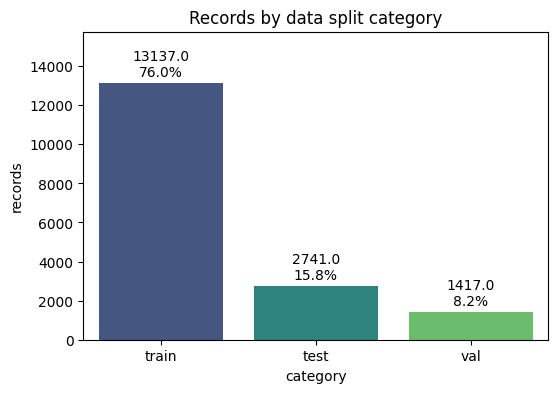

In [42]:
category_counts = df_to_eda['category'].value_counts()
total_counts = len(df_to_eda)

plt.figure(figsize=(6, 4))
ax= sns.countplot(data=df_to_eda, x='category', hue='category', palette='viridis', dodge=False, legend=False)
plt.title('Records by data split category')
plt.ylabel('records')
plt.xticks(rotation=0)

for p in ax.patches:
    height = p.get_height()
    percentage = height / total_counts * 100
    ax.annotate(f'{height}\n{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.ylim(0, max(category_counts) * 1.2)
plt.show()

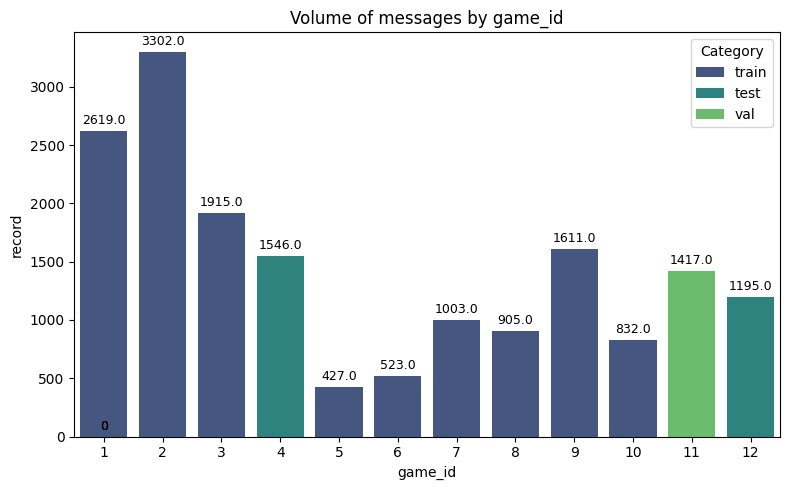

In [49]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_to_eda, x='game_id', hue='category', palette='viridis')

plt.title('Volume of messages by game_id')
plt.xlabel('game_id')
plt.ylabel('record')
plt.xticks(rotation=0)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Category')
plt.tight_layout()
plt.show()
